In [20]:
import simpy
import numpy as np
import random
import re
import matplotlib.pyplot as plt
from scipy import stats
import scikit_posthocs
import math

In [21]:
RANDOM_SEED = 112
NEW_CUSTOMERS = 500  # Total number of customers
CAPACITY = 51
wait_times = np.zeros(NEW_CUSTOMERS)
sojourn_times = np.zeros(NEW_CUSTOMERS)

def source(env, number, arrival_rate, counter, mu, fifo, st_distribution):
    """Source generates customers randomly"""
    for i in range(number):
        c = customer(env, f'Customer{i:2d}', counter, mu, fifo, st_distribution)
        env.process(c)
        t = random.expovariate(arrival_rate)
        yield env.timeout(t)

def customer(env, name, counter, mu, fifo, st_distribution):
    """Customer arrives, is served and leaves."""
    arrive = env.now
    
    # service time distributions
    if st_distribution == 'M':
        tib = random.expovariate(mu)
    elif st_distribution == 'D':
        tib = 1/mu
    elif st_distribution == 'LongTail':
        u = random.uniform(0,1)
        if u < 0.25:
            tib = random.expovariate(1/5)
        else:
            tib = random.expovariate(1)
    
    # Scheduling type
    if fifo:
        cr = counter.request()
    else:
        cr = counter.request(priority = tib)
    
    with cr as req:
        # Wait for the counter
        yield req
        start_time = env.now
        wait = start_time - arrive

        # We got to the counter
        yield env.timeout(tib)
    number = re.findall("\d+", name)[0]
    wait_times[int(number)] = wait
    sojourn_times[int(number)] = wait + tib

In [ ]:
# # Setup and start the simulation
# random.seed(RANDOM_SEED)
# env = simpy.Environment()

# # Start processes and run for N=1
# N = 1 # Amount of queues
# ARRIVAL_RATE = 50/N  # Generate new customers roughly every x seconds
# counter = simpy.Resource(env, capacity=N)
# env.process(source(env, NEW_CUSTOMERS, ARRIVAL_RATE, counter, CAPACITY))
# env.run()
# load = N * (ARRIVAL_RATE / CAPACITY)
# print(f"Amount of counters: {N}")
# print(f"Load on machines: {load}")
# print(f'Average wait time per person: {np.sum(wait_times)/NEW_CUSTOMERS}')
# print(f'Standard deviation of wait time: {np.std(wait_times)}')


In [ ]:
# # Setup and start the simulation
# random.seed(RANDOM_SEED)
# env = simpy.Environment()

# # Setup and start the simulation
# random.seed(RANDOM_SEED)
# env = simpy.Environment()
# # Start processes and run for N=2
# N = 2 # Amount of queues
# ARRIVAL_RATE = 50/N  # Generate new customers roughly every x seconds
# counter = simpy.Resource(env, capacity=N)
# env.process(source(env, NEW_CUSTOMERS, ARRIVAL_RATE, counter, CAPACITY))
# env.run()
# load = N * (ARRIVAL_RATE / CAPACITY)
# print(f"Amount of counters: {N}")
# print(f"Load on machines: {load}")
# print(f'Average wait time per person: {np.sum(wait_times)/NEW_CUSTOMERS}')
# print(f'Standard deviation of wait time: {np.std(wait_times)}')



In [ ]:
# # Setup and start the simulation
# random.seed(RANDOM_SEED)
# env = simpy.Environment()

# # Setup and start the simulation
# random.seed(RANDOM_SEED)
# env = simpy.Environment()
# # Start processes and run for N=4
# N = 4 # Amount of queues
# ARRIVAL_RATE = 50/N  # Generate new customers roughly every x seconds
# counter = simpy.Resource(env, capacity=N)
# env.process(source(env, NEW_CUSTOMERS, ARRIVAL_RATE, counter, CAPACITY))
# env.run()
# load = N * (ARRIVAL_RATE / CAPACITY)
# print(f"Amount of counters: {N}")
# print(f"Load on machines: {load}")
# print(f'Average wait time per person: {np.sum(wait_times)/NEW_CUSTOMERS}')
# print(f'Standard deviation of wait time: {np.std(wait_times)}')


In [22]:
RANDOM_SEED = 112
NEW_CUSTOMERS = 500  # Total number of customers
CAPACITY = 51
wait_times = np.zeros(NEW_CUSTOMERS)

def source_sjf(env, number, interval, counter, time_needed):
    """Source generates customers randomly"""
    for i in range(number):
        c = customer_sjf(env, f'Customer{i:2d}', counter, time_in_bank=time_needed)
        env.process(c)
        t = random.expovariate(1 / interval)
        yield env.timeout(t)


def customer_sjf(env, name, counter, time_in_bank):
    """Customer arrives, is served and leaves."""
    arrive = env.now
    tib = random.expovariate(1.0 / time_in_bank)
    
    with counter.request(priority = tib) as req:
        # Wait for the counter
        yield req
        start_time = env.now
        wait = env.now - arrive

        # We got to the counter
        yield env.timeout(tib)
    number = re.findall("\d+", name)[0]
    wait_times[int(number)] = wait


In [ ]:
# # Setup and start the simulation
# random.seed(RANDOM_SEED)
# env = simpy.Environment()

# # Start processes and run for N=1
# N = 1 # Amount of queues
# ARRIVAL_RATE = 50/N  # Generate new customers roughly every x seconds
# counter = simpy.PriorityResource(env, capacity=N)
# env.process(source_sjf(env, NEW_CUSTOMERS, ARRIVAL_RATE, counter, CAPACITY))
# env.run()
# load = N * (ARRIVAL_RATE / CAPACITY)
# print(f"Amount of counters: {N}")
# print(f"Load on machines: {load}")
# print(f'Average wait time per person: {np.sum(wait_times)/NEW_CUSTOMERS}')
# print(f'Standard deviation of wait time: {np.std(wait_times)}')



In [ ]:
# # Setup and start the simulation
# random.seed(RANDOM_SEED)
# env = simpy.Environment()

# # Start processes and run for N=1
# N = 2 # Amount of queues
# ARRIVAL_RATE = 50/N  # Generate new customers roughly every x seconds
# counter = simpy.PriorityResource(env, capacity=N)
# env.process(source_sjf(env, NEW_CUSTOMERS, ARRIVAL_RATE, counter, CAPACITY))
# env.run()
# load = N * (ARRIVAL_RATE / CAPACITY)
# print(f"Amount of counters: {N}")
# print(f"Load on machines: {load}")
# print(f'Average wait time per person: {np.sum(wait_times)/NEW_CUSTOMERS}')
# print(f'Standard deviation of wait time: {np.std(wait_times)}')



In [ ]:
# # Setup and start the simulation
# random.seed(RANDOM_SEED)
# env = simpy.Environment()

# # Start processes and run for N=1
# N = 4 # Amount of queues
# ARRIVAL_RATE = 50/N  # Generate new customers roughly every x seconds
# counter = simpy.PriorityResource(env, capacity=N)
# env.process(source_sjf(env, NEW_CUSTOMERS, ARRIVAL_RATE, counter, CAPACITY))
# env.run()
# load = N * (ARRIVAL_RATE / CAPACITY)
# print(f"Amount of counters: {N}")
# print(f"Load on machines: {load}")
# print(f'Average wait time per person: {np.sum(wait_times)/NEW_CUSTOMERS}')
# print(f'Standard deviation of wait time: {np.std(wait_times)}')


In [23]:
def des(n, new_costumers, rho, mu, fifo, st_distribution):
    """
    Run DES model
    """
    env = simpy.Environment()
    
    # Check input distribution
    if st_distribution not in ['M', 'D', 'LongTail']:
        print("Service time distribution unknown, try again!")
        return
    
    # Find lambda
    arrival_rate = rho*mu*n  # Generate new customers roughly every x seconds
    
    # Set up data_arrays
    global wait_times
    wait_times = np.zeros(new_costumers)

    # Set up scheduling type
    if fifo:
        counter = simpy.Resource(env, n)
    else:
        counter = simpy.PriorityResource(env, n)
    
    # Run DES process
    env.process(source(env, new_costumers, arrival_rate, counter, mu, fifo, st_distribution))
    env.run()
    print(f"Amount of counters: {n}")
    print(f"Load on machines: {rho}")
    print(f'Average wait time per person: {np.sum(wait_times)/new_costumers} +\- {np.std(wait_times)}')
    plt.hist(wait_times)
    plt.show()

In [24]:
def des2(n, new_costumers, rho, mu, fifo, st_distribution):
    """
    Run DES model
    """
    env = simpy.Environment()
    
    # Check input distribution
    if st_distribution not in ['M', 'D', 'LongTail']:
        print("Service time distribution unknown, try again!")
        return
    
    # Find lambda
    arrival_rate = rho*mu*n
    
    # Set up data_arrays
    global wait_times
    wait_times = np.zeros(new_costumers)

    global sojourn_times
    sojourn_times = np.zeros(new_costumers)

    # Set up scheduling type
    if fifo:
        counter = simpy.Resource(env, n)
    else:
        counter = simpy.PriorityResource(env, n)
    
    # Run DES process
    env.process(source(env, new_costumers, arrival_rate, counter, mu, fifo, st_distribution))
    env.run()
    
    # print(f"Amount of counters: {n}")
    # print(f"Load on machines: {rho}")
    # print(f'Average wait time per person: {np.sum(wait_times)/new_costumers} +\- {np.std(wait_times)}')
    # plt.hist(wait_times)
    # plt.show()

c:\Users\kevin\anaconda3\envs\IntroCS\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\kevin\anaconda3\envs\IntroCS\lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


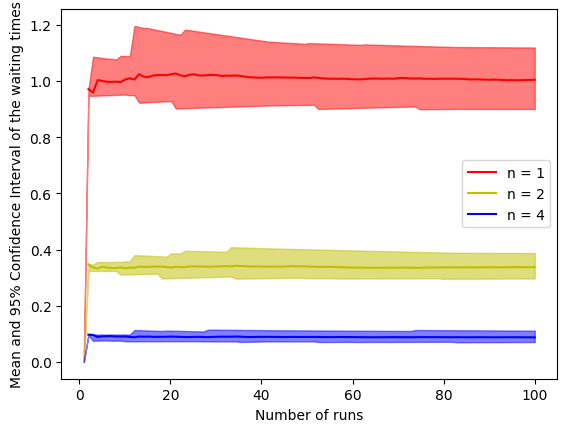

c:\Users\kevin\anaconda3\envs\IntroCS\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\kevin\anaconda3\envs\IntroCS\lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


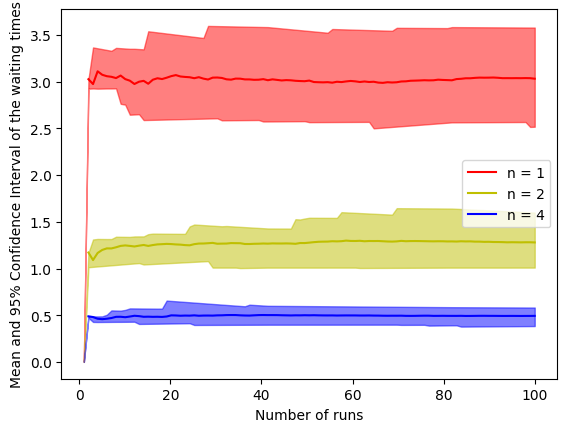

c:\Users\kevin\anaconda3\envs\IntroCS\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\kevin\anaconda3\envs\IntroCS\lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


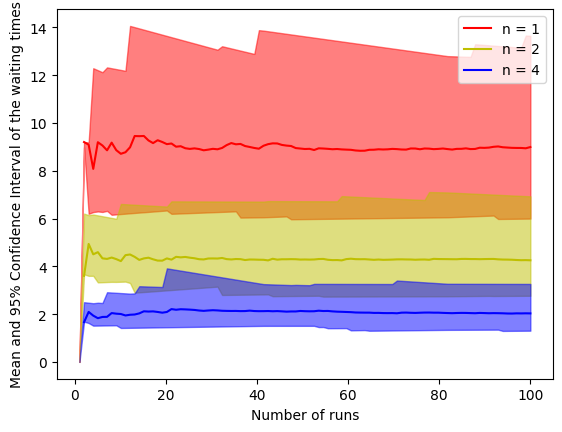

c:\Users\kevin\anaconda3\envs\IntroCS\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\kevin\anaconda3\envs\IntroCS\lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


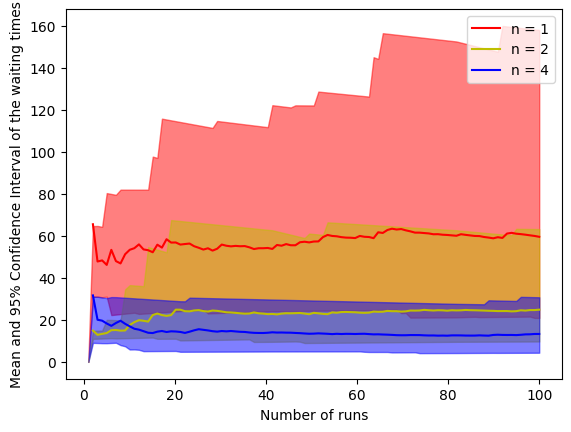

In [28]:
# Used for statistical testing of the means of the wait times for n=1, n=2 and n=4.
ns = [1, 2, 4]
rhos = np.array([0.5, 0.75, 0.9, 0.99])
new_costumers = 10000
mu = 1
fifo = True
st_distribution = 'M'
runs = 100
x=np.linspace(1, runs, runs-1)
data = np.zeros((len(rhos), runs, len(ns)))
data_mean = np.zeros((runs, len(ns)))
data_CI = np.zeros((runs, len(ns), 2))

for rho_index, rho in enumerate(rhos):
    for i in range(runs):
        for n_index, n in enumerate(ns):
            # Running the model
            des2(n, new_costumers, rho, mu, fifo, st_distribution)
            data[rho_index, i, n_index] = np.mean(wait_times[1000:])
        data_mean[i,:] = np.mean(data[rho_index, :i, :], axis=0)
        if i > 1:
            data_CI[i-1, :, :] = np.transpose(np.percentile(data[rho_index, :i, :], [2.5, 97.5], axis=0))
    plt.figure(facecolor='white')
    plt.style.use('default')
    ax = plt.axes()
    ax.set_facecolor('white')
    plt.plot(x, data_mean[:i, 0], label='n = 1', color='r')
    plt.plot(x, data_mean[:i, 1], label='n = 2', color='y')
    plt.plot(x, data_mean[:i, 2], label='n = 4', color='b')
    plt.fill_between(x, data_CI[:i, 0, 0], data_CI[:i, 0, 1], color='r', alpha=0.5)    
    plt.fill_between(x, data_CI[:i, 1, 0], data_CI[:i, 1, 1], color='y', alpha=0.5)    
    plt.fill_between(x, data_CI[:i, 2, 0], data_CI[:i, 2, 1], color='b', alpha=0.5)
    plt.legend()
    plt.xlabel('Number of runs')
    plt.ylabel('Mean and 95% Confidence Interval of the waiting times')
    plt.show()

    # Check whether we have to do an One-way ANOVA or a Kruskal-Wallis H-test
    _, p_normal = stats.normaltest(data[rho_index], axis=0)
    _, p_levene = stats.levene(data[rho_index][:,0], data[rho_index][:,1], data[rho_index][:,2])
    print(f'for rho = {rho}, the p_normal values are for n=1, n=2 and n=4 respectively: {p_normal}')
    print(f'For rho = {rho}, the p_levene = {p_levene}')
    # Perform either One-way ANOVA or Kruskal-Wallis H-test and print
    F, p_anova = stats.f_oneway(data[rho_index][:,0], data[rho_index][:,1], data[rho_index][:,2])
    print(f'One-way Anova test for rho = {rho} with F = {F} and p = {p_anova}')
    H, p_kruskal = stats.kruskal(data[rho_index][:,0], data[rho_index][:,1], data[rho_index][:,2])
    print(f'Kruskal-Wallis H-test for rho = {rho} with H = {H} and p = {p_kruskal}')

In [ ]:
# Mean number of customer calculation
rhos = np.linspace(0.01, 0.99, 99)
runs = 1000
mean_nr_customers = np.zeros((len(rhos), runs))
average_nr_customers = np.zeros(len(rhos))
CI_nr_customers = np.zeros((len(rhos), 2))
for rho_index, rho in enumerate(rhos):
    for i in range(runs):
        des2(n, new_costumers, rho, mu, fifo, st_distribution)
        arrival_rate = rho*mu*n
        mean_nr_customers[rho_index, i] = np.mean(np.array(sojourn_times))*arrival_rate
    average_nr_customers[rho_index] = np.mean(mean_nr_customers[rho_index], axis=0)
    CI_nr_customers[rho_index] = np.percentile(mean_nr_customers[rho_index], [2.5, 97.5], axis=0)
plt.figure()
plt.plot(rhos, average_nr_customers)
plt.fill_between(rhos, CI_nr_customers[:,0],CI_nr_customers[:,1], alpha = 0.5)
plt.xlabel('rho')
plt.ylabel('mean number of customers')
plt.show()

In [ ]:
def conditions(len_CI, len_last10, n_index, rho_index, nr_customers, tol, tol_i):
    condition1 = (nr_customers > 35)
    condition2 = ((np.abs(len_CI[tol_i, n_index, rho_index, nr_customers] - len_last10)/len_last10) < tol) 
    condition3 = (len_last10 > 0) 
    condition4 = (len_CI[tol_i, n_index, rho_index, nr_customers] > 0)
    condition5 = (math.isnan(np.abs(len_CI[tol_i, n_index, rho_index, nr_customers] - len_last10)/len_last10) == 0)
    condition6 = (math.isinf(np.abs(len_CI[tol_i, n_index, rho_index, nr_customers] - len_last10)/len_last10) == 0)
    condition7 = (len_CI[tol_i, n_index, rho_index, nr_customers] > 0)
    return (condition1*condition2*condition3*condition4*condition5*condition6*condition7 == 1)
    

In [ ]:
# For every value of rho, calculate the minimum number of customers for steady state.

ns = [1, 2, 4]
rhos = np.linspace(0.11, 0.99, 89)
new_customers = 1000
tols = np.array([1])
mu = 1
fifo = True
st_distribution = 'M'
runs = 100
data = np.zeros((len(tols), len(ns), len(rhos), new_customers, runs))
data_mean = np.zeros((len(tols), len(ns),len(rhos), new_customers))
data_CI = np.zeros((len(tols), len(ns),len(rhos), new_customers, 2))
len_CI = np.zeros((len(tols), len(ns), len(rhos), new_customers))
n_crit = np.zeros((len(tols), len(ns), len(rhos)))
for tol_i, tol in enumerate(tols):
    for rho_index, rho in enumerate(rhos):
        for n_index, n in enumerate(ns):
            nr_customers = 20
            while n_crit[tol_i, n_index, rho_index] == 0:
                for i in range(runs):
                    # Running the model
                    des2(n, nr_customers, rho, mu, fifo, st_distribution)
                    data[tol_i, n_index, rho_index, nr_customers, i] = np.mean(wait_times)
                data_mean[tol_i, n_index, rho_index, nr_customers] = np.mean(data[tol_i, n_index, rho_index, :nr_customers, :])
                data_CI[tol_i, n_index, rho_index, nr_customers, :] = np.percentile(data[tol_i, n_index, rho_index, :i, :], [2.5, 97.5])
                len_CI[tol_i, n_index, rho_index, nr_customers] = data_CI[tol_i, n_index, rho_index, nr_customers,1]-data_CI[tol_i, n_index, rho_index, nr_customers,0]
                len_last10 = np.mean(len_CI[tol_i, n_index, rho_index, nr_customers-10:nr_customers-1])
                if conditions(len_CI, len_last10, n_index, rho_index, nr_customers, tol, tol_i):
                    print(f'for n = {n}, rho = {rho} critical nr_customers = {nr_customers}')
                    n_crit[tol_i, n_index, rho_index] = nr_customers
                if nr_customers == new_customers - 1:
                    print('nr_customers out of bound')
                    n_crit[tol_i, n_index, rho_index] = -1
                nr_customers += 1
    plt.figure()
    plt.style.use('default')
    plt.scatter(rhos, n_crit[tol_i, 0,:], label='n=1', color='r', marker= "x")
    plt.scatter(rhos, n_crit[tol_i, 1,:], label='n=2', color='y', marker= "x")
    plt.scatter(rhos, n_crit[tol_i, 2,:], label='n=4', color='b', marker= "x")
    plt.legend()
    plt.xlabel(r"$\rho$")
    plt.ylabel('critical number of customers')
    plt.savefig('Critical nr of customers against rho-values')
    plt.title(f'plot for tol = {tol}')
    plt.show()

In [ ]:
plt.figure()
plt.style.use('default')
plt.scatter(rhos, n_crit[tol_i, 0,:], label='n=1', color='r', marker= "x")
plt.scatter(rhos, n_crit[tol_i, 1,:], label='n=2', color='y', marker= "x")
plt.scatter(rhos, n_crit[tol_i, 2,:], label='n=4', color='b', marker= "x")
plt.legend()
plt.xlabel(r"$\rho$")
plt.ylabel('critical number of customers')
plt.savefig(f'Critical nr of customers against rho-values for tol = {tol}')
plt.title(f'plot for tol = {tol}')
plt.show()

0
1
2
3
4
5
6
7
8
0
1
2
3
4
5
6
7
8


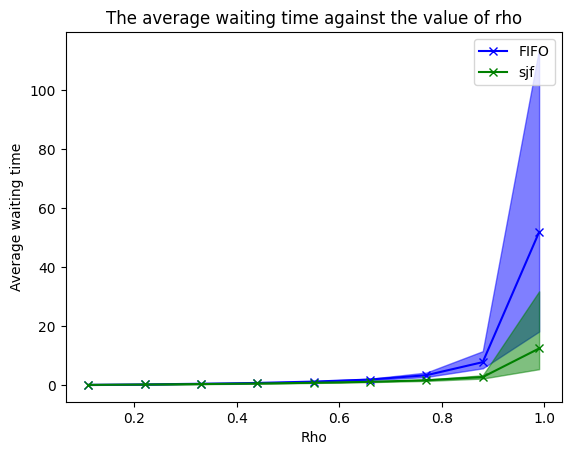

In [36]:
# For sjf and fifo run the model and plot wait_times. 
n = 1
rhos = np.linspace(0.01, 0.99, 99)
new_costumers = 10000
runs = 100
mu = 1
fifos = [True, False]
st_distribution = 'M'
data = np.zeros((len(fifos), len(rhos), runs))
data_mean = np.zeros((len(fifos), len(rhos)))
data_CI = np.zeros((len(fifos), len(rhos), 2))

for fifo_index, fifo in enumerate(fifos):
    for rho_index, rho in enumerate(rhos):
        for run in range(runs):
            des2(n, new_costumers, rho, mu, fifo, st_distribution)
            data[fifo_index, rho_index, run] = np.mean(wait_times[1000:])
        data_mean[fifo_index, rho_index] = np.mean(data[fifo_index, rho_index, :])
        data_CI[fifo_index, rho_index, :] = np.percentile(data[fifo_index, rho_index, :], [2.5, 97.5])
        print(rho_index)

plt.figure()
plt.plot(rhos, data_mean[0], label='FIFO', color='b', marker='x')
plt.plot(rhos, data_mean[1], label='sjf', color = 'g', marker='x')
plt.fill_between(rhos, data_CI[0, :, 0], data_CI[0, :, 1], color='b', alpha=0.5)
plt.fill_between(rhos, data_CI[1, :, 0], data_CI[1, :, 1], color='g', alpha=0.5)
plt.legend()
plt.xlabel('Rho')
plt.ylabel('Average waiting time')
plt.title('The average waiting time against the value of rho')
plt.savefig('fifo vs sjf for all rhos')
plt.show()


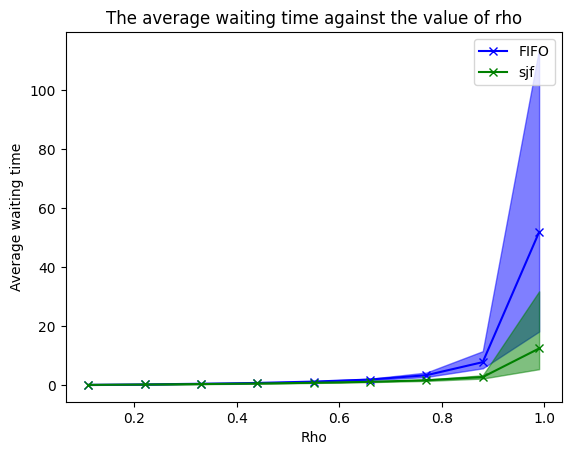

In [38]:
plt.figure()
plt.plot(rhos, data_mean[0], label='FIFO', color='b', marker='x')
plt.plot(rhos, data_mean[1], label='sjf', color = 'g', marker='x')
plt.fill_between(rhos, data_CI[0, :, 0], data_CI[0, :, 1], color='b', alpha=0.5)
plt.fill_between(rhos, data_CI[1, :, 0], data_CI[1, :, 1], color='g', alpha=0.5)
plt.legend()
plt.xlabel('Rho')
plt.ylabel('Average waiting time')
plt.title('The average waiting time against the value of rho')
plt.savefig('fifo vs sjf for all rhos')
plt.show()

In [ ]:
# For sjf and fifo run the model and statistically compare wait_times. 
n = 1
rhos = np.array([0.5, 0.75, 0.9, 0.99])
new_costumers = 10000
runs = 100
mu = 1
fifos = [True, False]
st_distribution = 'M'
data = np.zeros((len(fifos), len(rhos), runs))
data_mean = np.zeros((len(fifos), len(rhos)))
data_CI = np.zeros((len(fifos), len(rhos), 2))
p_normal = np.zeros((len(rhos), len(fifos)))

for rho_index, rho in enumerate(rhos):
    for fifo_index, fifo in enumerate(fifos):
        for run in range(runs):
            des2(n, new_costumers, rho, mu, fifo, st_distribution)
            data[fifo_index, rho_index, run] = np.mean(wait_times[1000:])
        data_mean[fifo_index, rho_index] = np.mean(data[fifo_index, rho_index, :])
        data_CI[fifo_index, rho_index, :] = np.percentile(data[fifo_index, rho_index, :], [2.5, 97.5])
        _, p_normal[rho_index, fifo_index] = stats.normaltest(data[fifo_index, rho_index], axis=0)
        print(f'for fifo = {fifo} en rho = {rho}, the p_normal value is = {p_normal}')
    _, p_levene = stats.levene(data_mean[0,:], data_mean[1,:])
    print(f'For rho = {rho}, the Levene\'s test between fifo and sjf is p_levene = {p_levene}')
    T, p_ttest = stats.ttest_ind(data[:, rho_index, :])
    print(f'The T-test has a value of {T} with a significance of p_ttest = {p_ttest}')
    U, p_MW = stats.mannwhitneyu(data[:, rho_index, :])
    
